In [1]:
import cv2
from keras.utils import load_img
from keras.saving import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from segment_anything import sam_model_registry, SamPredictor
from skimage.measure import regionprops, regionprops_table
from tqdm import trange, tqdm

import segmenteverygrain as seg

from tqdm import trange
%matplotlib inline

In [2]:
# checking if python is using the correct chip architecture
!python -c "import platform; print(platform.machine())"

arm64


In [3]:
# checking if the GPU is available to tensorflow
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
from keras.optimizers import Adam
model = seg.Unet() # create model
model.compile(optimizer=Adam(), loss=seg.weighted_crossentropy, metrics=["accuracy"])

In [49]:
input_dir = "../images/"
patch_dir = "../patches/"
image_dir, mask_dir = seg.patchify_training_data(input_dir, patch_dir)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [01:08<00:00,  1.03s/it]


In [11]:
image_dir = '../patches/Patches/images'
mask_dir = '../patches/Patches/labels'

In [12]:
train_dataset, val_dataset, test_dataset = seg.create_train_val_test_data(image_dir, mask_dir, augmentation=True)

Epoch 1/200


2025-07-01 11:57:16.731957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


848/848 ━━━━━━━━━━━━━━━━━━━━ 193s 218ms/step - accuracy: 0.6352 - loss: 1.0152 - val_accuracy: 0.7452 - val_loss: 0.9420
Epoch 2/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 187s 220ms/step - accuracy: 0.7853 - loss: 0.8900 - val_accuracy: 0.7477 - val_loss: 0.9010
Epoch 3/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 191s 224ms/step - accuracy: 0.8156 - loss: 0.8615 - val_accuracy: 0.7921 - val_loss: 0.8837
Epoch 4/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 193s 228ms/step - accuracy: 0.8223 - loss: 0.8552 - val_accuracy: 0.8345 - val_loss: 0.8513
Epoch 5/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 190s 224ms/step - accuracy: 0.8389 - loss: 0.8395 - val_accuracy: 0.8445 - val_loss: 0.8487
Epoch 6/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 190s 223ms/step - accuracy: 0.8459 - loss: 0.8331 - val_accuracy: 0.8271 - val_loss: 0.8654
Epoch 7/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 188s 221ms/step - accuracy: 0.8488 - loss: 0.8296 - val_accuracy: 0.8473 - val_loss: 0.8283
Epoch 8/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 189s 222ms/step - accuracy: 0.8535 - los

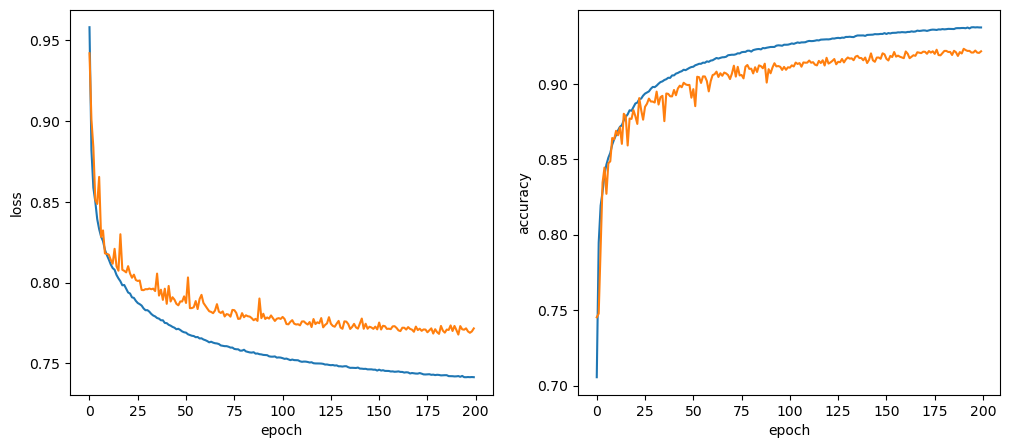

In [15]:
model = seg.create_and_train_model(train_dataset, val_dataset, test_dataset, epochs=200)

In [ ]:
# save model
model.save('../models/seg_model.keras')

In [ ]:
# load model
from keras.saving import load_model
loaded_model = load_model("../models/seg_model.keras", custom_objects={'weighted_crossentropy': seg.weighted_crossentropy})